# Sales and Order Analysis  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

In [2]:
ecom_data_df = pd.read_parquet("../data/olist_ecom.parquet")

In [3]:
display(ecom_data_df.sample(1))
ecom_data_df.info()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score_string,RFM_score_composite,RFM_segment
6151,6151,bfea4a98ad57e429a31dab20bfe4375f,13fe2bd5cd6f09642f395ae04faa6b66,5665.0,sao paulo,SP,969791845aebad4fe9d49530189384b9,delivered,2018-02-12 16:51:09,2018-02-08 07:35:59,2018-02-14 21:57:32,2018-02-19 21:48:58,2018-02-22,1.0,boleto,1.0,819.32,3.0,07a6879526099e7f3483481e5bd60b77,8f2ce03f928b567e3d56181ae20ae952,2018-02-14 07:35:59,189.9,14.93,esporte_lazer,45.0,235.0,2.0,3000.0,60.0,15.0,15.0,-4.385532,6.598299,4.994051,7.206817,-2.090995,1,1638.64,209,3,1,5,315,9,Single Buyers (Moderate R & High M)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          7475 non-null   int64         
 1   customer_id                    7475 non-null   object        
 2   customer_unique_id             7475 non-null   object        
 3   customer_zip_code_prefix       6877 non-null   float64       
 4   customer_city                  7475 non-null   object        
 5   customer_state                 7475 non-null   object        
 6   order_id                       7475 non-null   object        
 7   order_status                   7475 non-null   object        
 8   order_purchase_timestamp       7475 non-null   datetime64[ns]
 9   order_approved_at              7475 non-null   datetime64[ns]
 10  order_delivered_carrier_date   7409 non-null   datetime64[ns]
 11  order_delivered_c

## Overall Sales Volume & Value
---
- what is the total order products?
- What is the total price and freight_value?
- What is the average order value (price + freight_value) per order?

In [4]:
total_order = ecom_data_df["order_id"].nunique()
total_revenue = ecom_data_df["price"].sum()
total_freight_value = ecom_data_df["freight_value"].sum()
avg_order = ecom_data_df.groupby("price")["freight_value"].sum().mean()
total_sales = total_revenue + total_freight_value

In [5]:
print(f"total order products: {total_order:,.0f}")
print(f"total revenue sales: R$ {total_revenue:,.2f}")
print(f"total freight price: R$ {total_freight_value:,.2f}")
print(f"average order product price: R$ {avg_order:,.2f}")
print(f"total sales (price + freight price): R$ {total_sales:,.2f}")

total order products: 6,817
total revenue sales: R$ 914,077.08
total freight price: R$ 145,420.97
average order product price: R$ 93.46
total sales (price + freight price): R$ 1,059,498.05


## Monthly sales Trend

In [6]:
ecom_data_df["order_period"] = ecom_data_df["order_purchase_timestamp"].dt.to_period(
    "M"
)
monthly_orders = (
    ecom_data_df.groupby("order_period")["order_id"].nunique().reset_index()
)
monthly_orders["order_period"] = monthly_orders["order_period"].astype(str)

Make plot

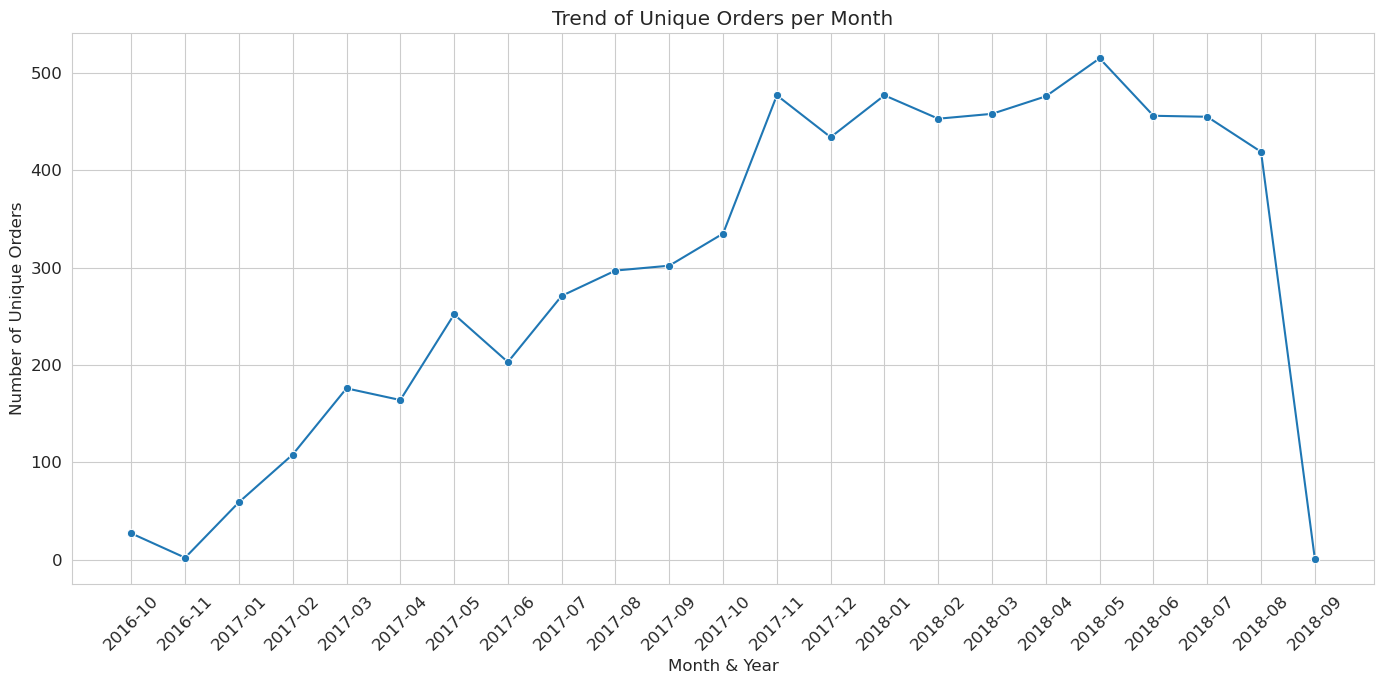

In [7]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="order_period", y="order_id", data=monthly_orders, marker="o")
plt.title("Trend of Unique Orders per Month")
plt.xlabel("Month & Year")
plt.ylabel("Number of Unique Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Monthly sales Trend (total product price)

In [8]:
monthly_revenue = ecom_data_df.groupby("order_period")["price"].sum().reset_index()
monthly_revenue["order_period"] = monthly_revenue["order_period"].astype(str)

Make lineplot

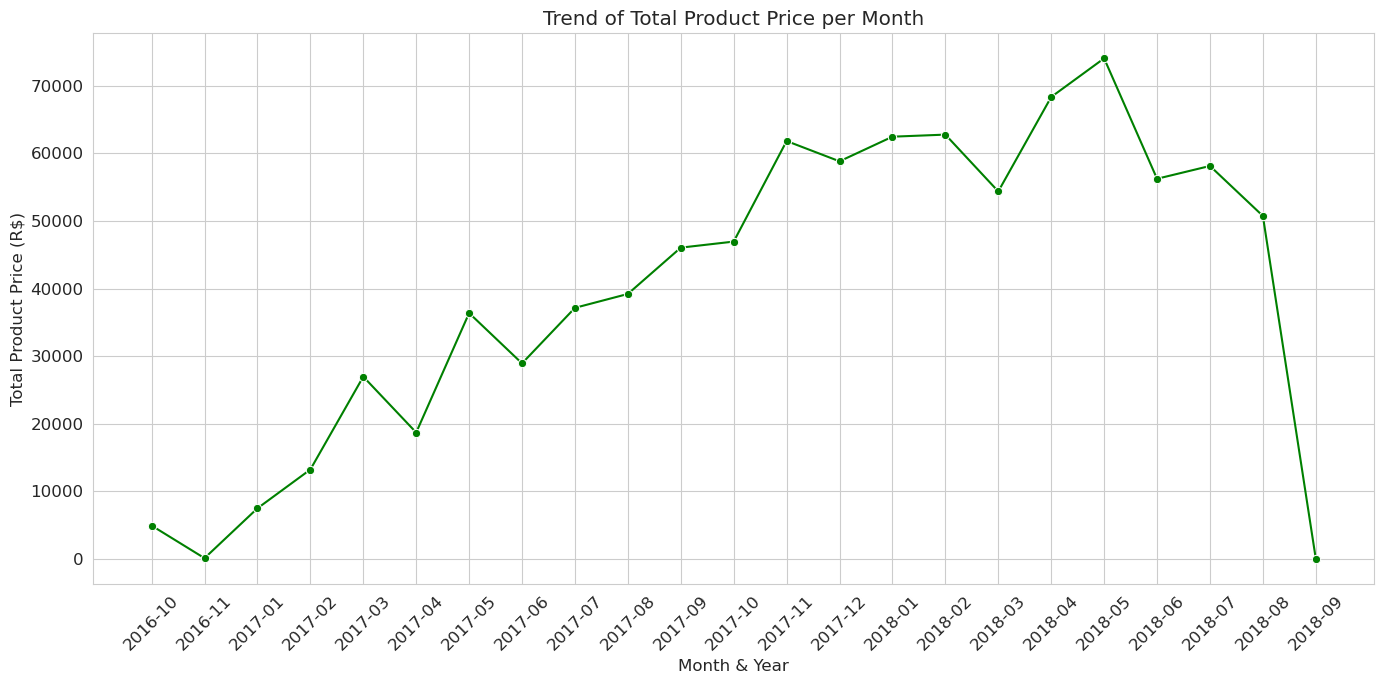

In [9]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="order_period", y="price", data=monthly_revenue, marker="o", color="green"
)
plt.title("Trend of Total Product Price per Month")
plt.xlabel("Month & Year")
plt.ylabel("Total Product Price (R$)")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.show()

## Sales Trend by Day of the Week

In [10]:
ecom_data_df["order_day"] = ecom_data_df["order_purchase_timestamp"].dt.day_name()
# Set explicit order for days of the week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
ecom_data_df["order_day"] = pd.Categorical(
    ecom_data_df["order_day"], categories=day_order, ordered=True
)

daily_orders = ecom_data_df.groupby("order_day")["order_id"].nunique().reset_index()

/tmp/ipykernel_86526/3406402376.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_orders = ecom_data_df.groupby("order_day")["order_id"].nunique().reset_index()


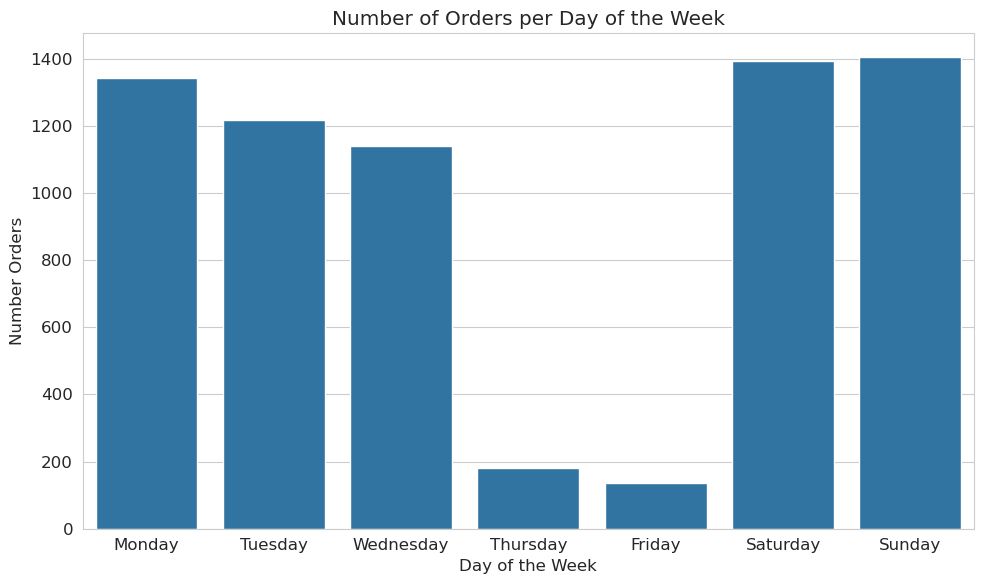

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="order_day", y="order_id", data=daily_orders)
plt.title("Number of Orders per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number Orders")
plt.tight_layout()
plt.show()